EDA (Matplotlib + Seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('heart_disease_uci.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [2]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Target distribution (class balance)

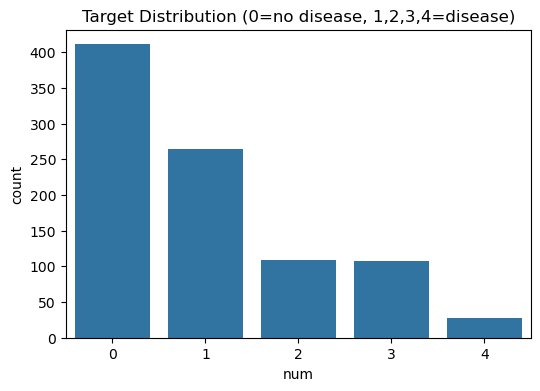

num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title('Target Distribution (0=no disease, 1,2,3,4=disease)')
plt.show()

# percentage
print(df['num'].value_counts(normalize=True))


Numeric features distribution & outlier detection

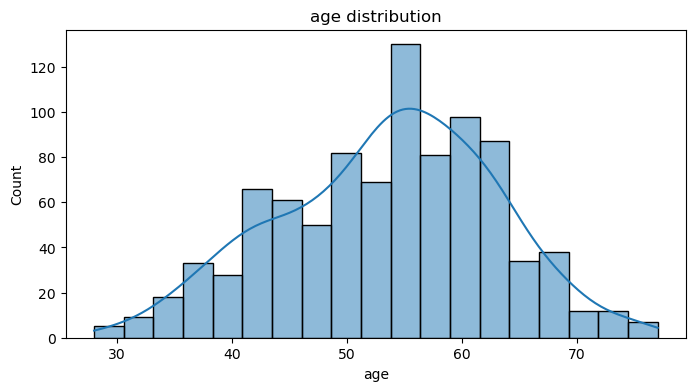

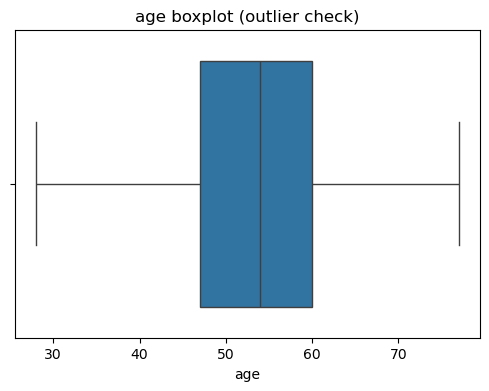

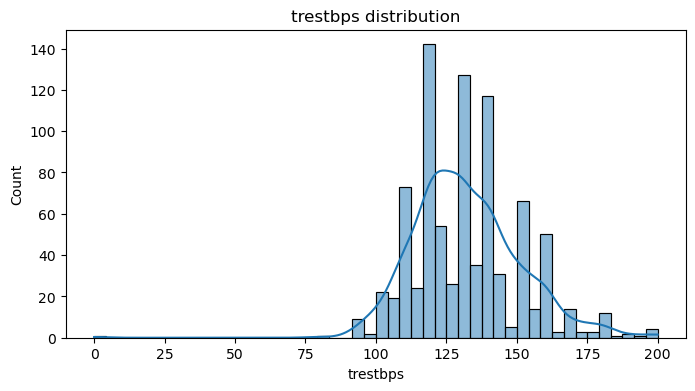

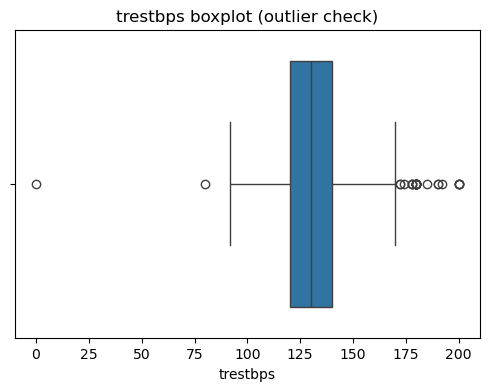

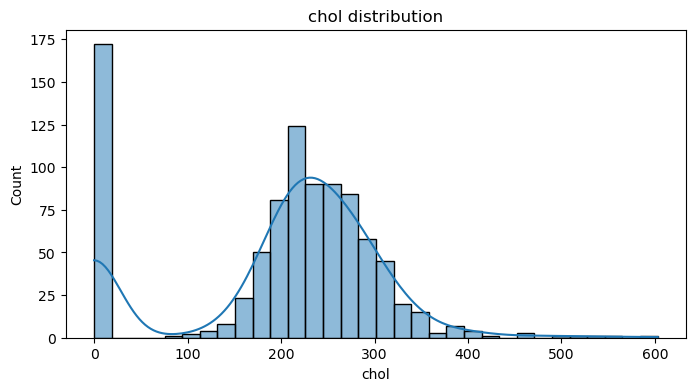

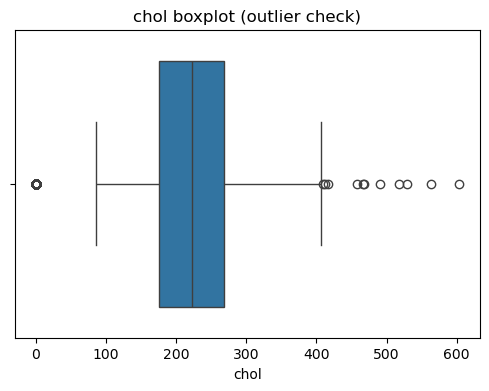

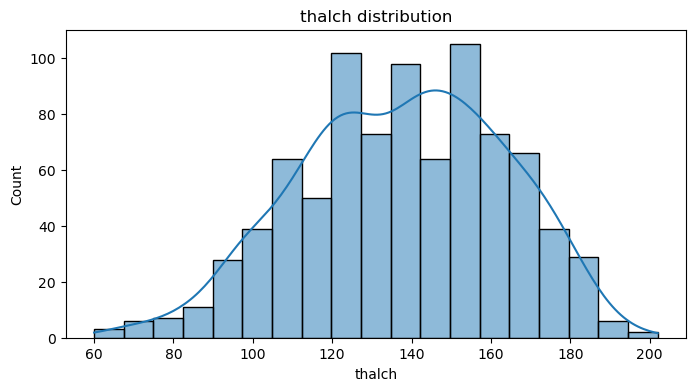

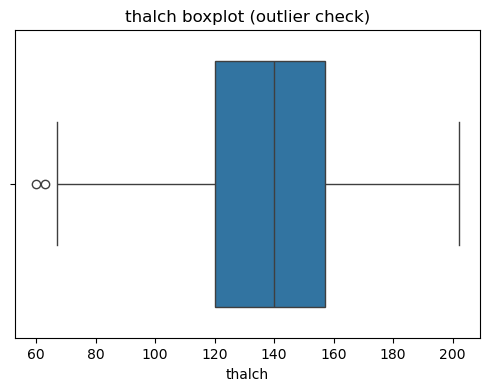

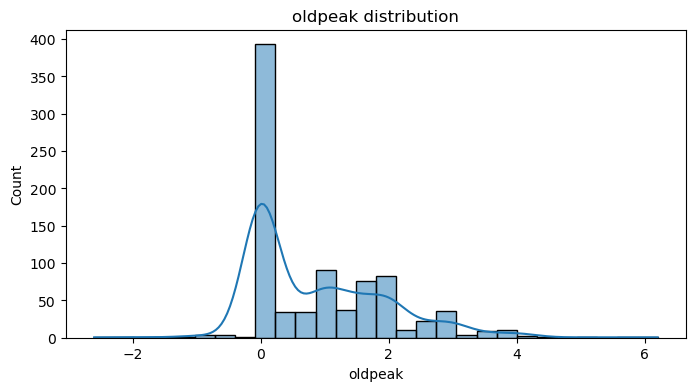

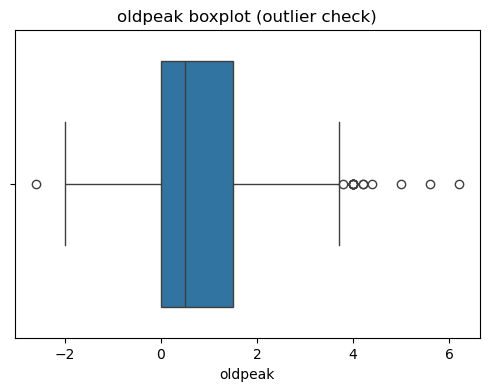

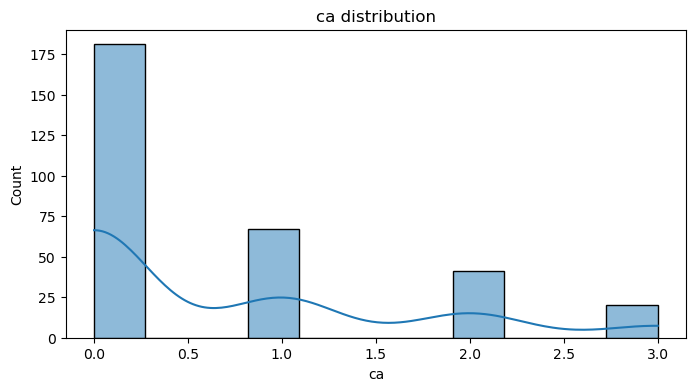

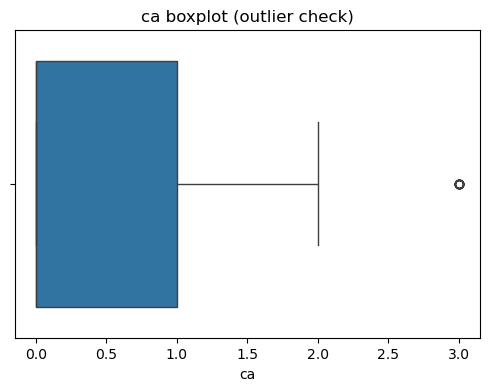

In [4]:
numeric_cols = ['age','trestbps','chol','thalch','oldpeak','ca']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'{col} boxplot (outlier check)')
    plt.show()


4️⃣ Categorical features analysis

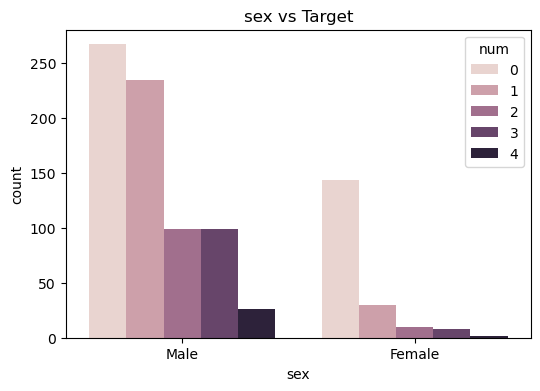

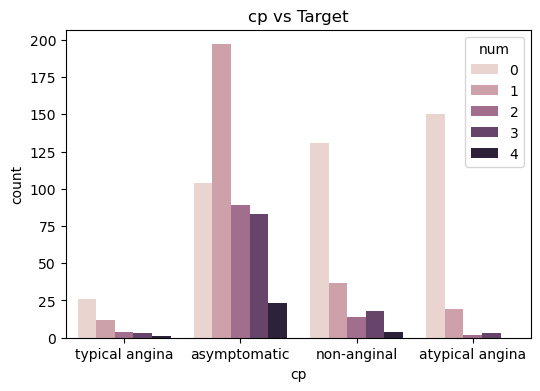

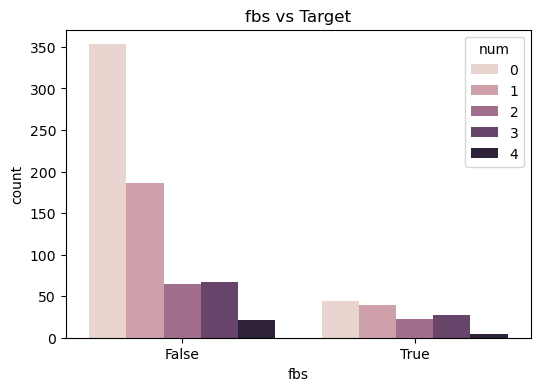

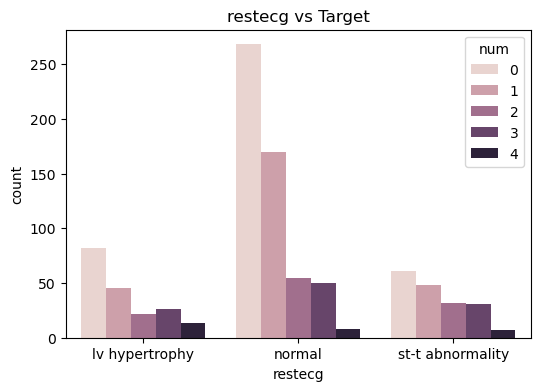

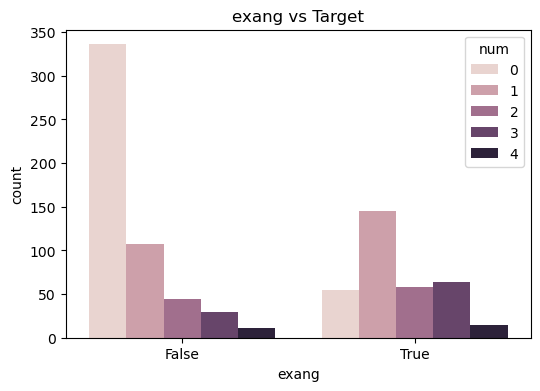

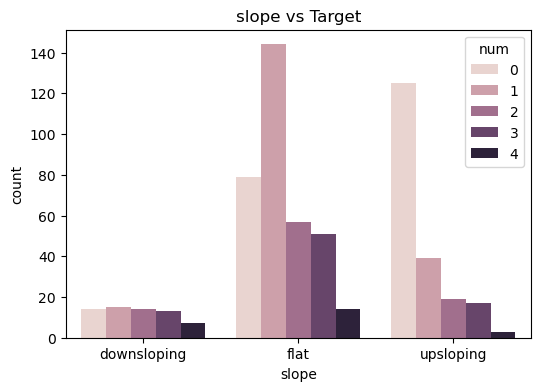

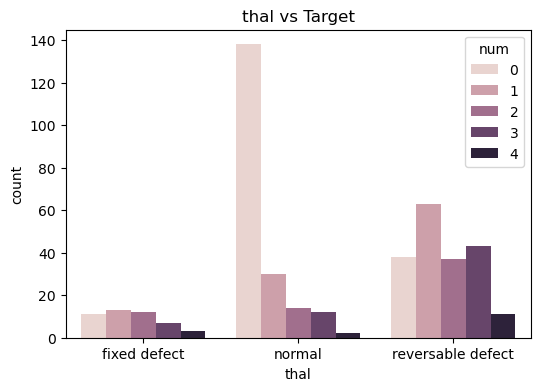

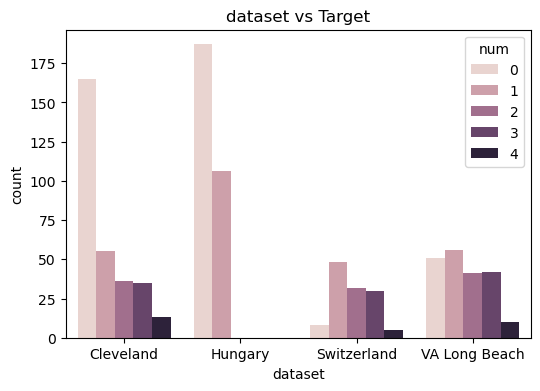

In [5]:
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','thal','dataset']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='num', data=df)
    plt.title(f'{col} vs Target')
    plt.show()


5️⃣ Correlation & pairwise relations

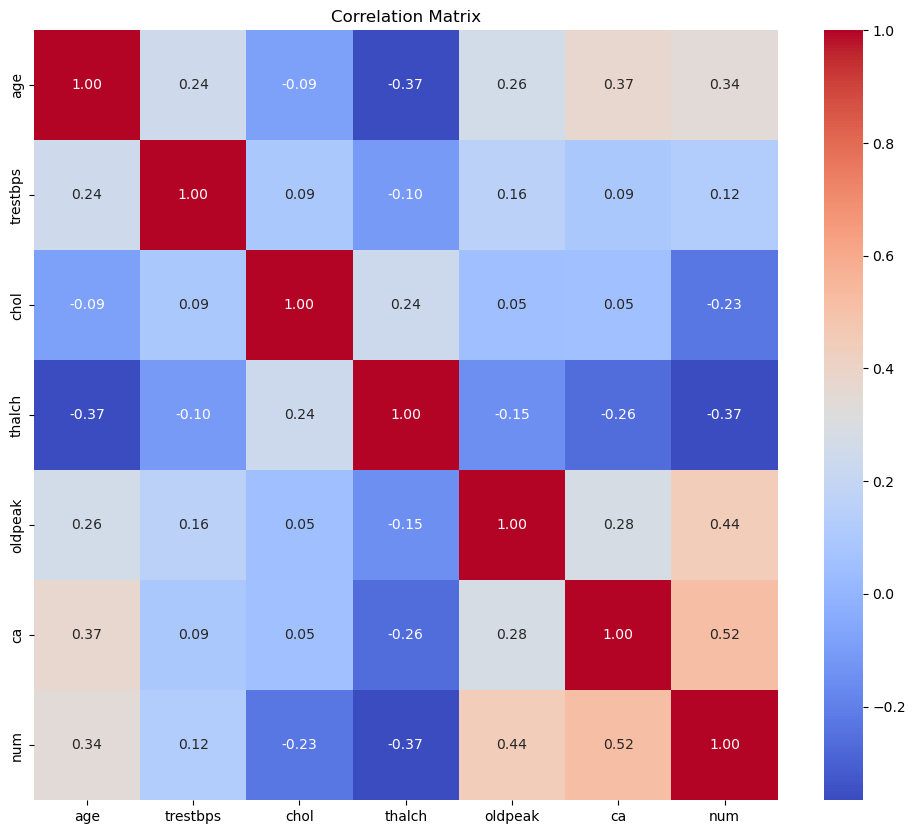

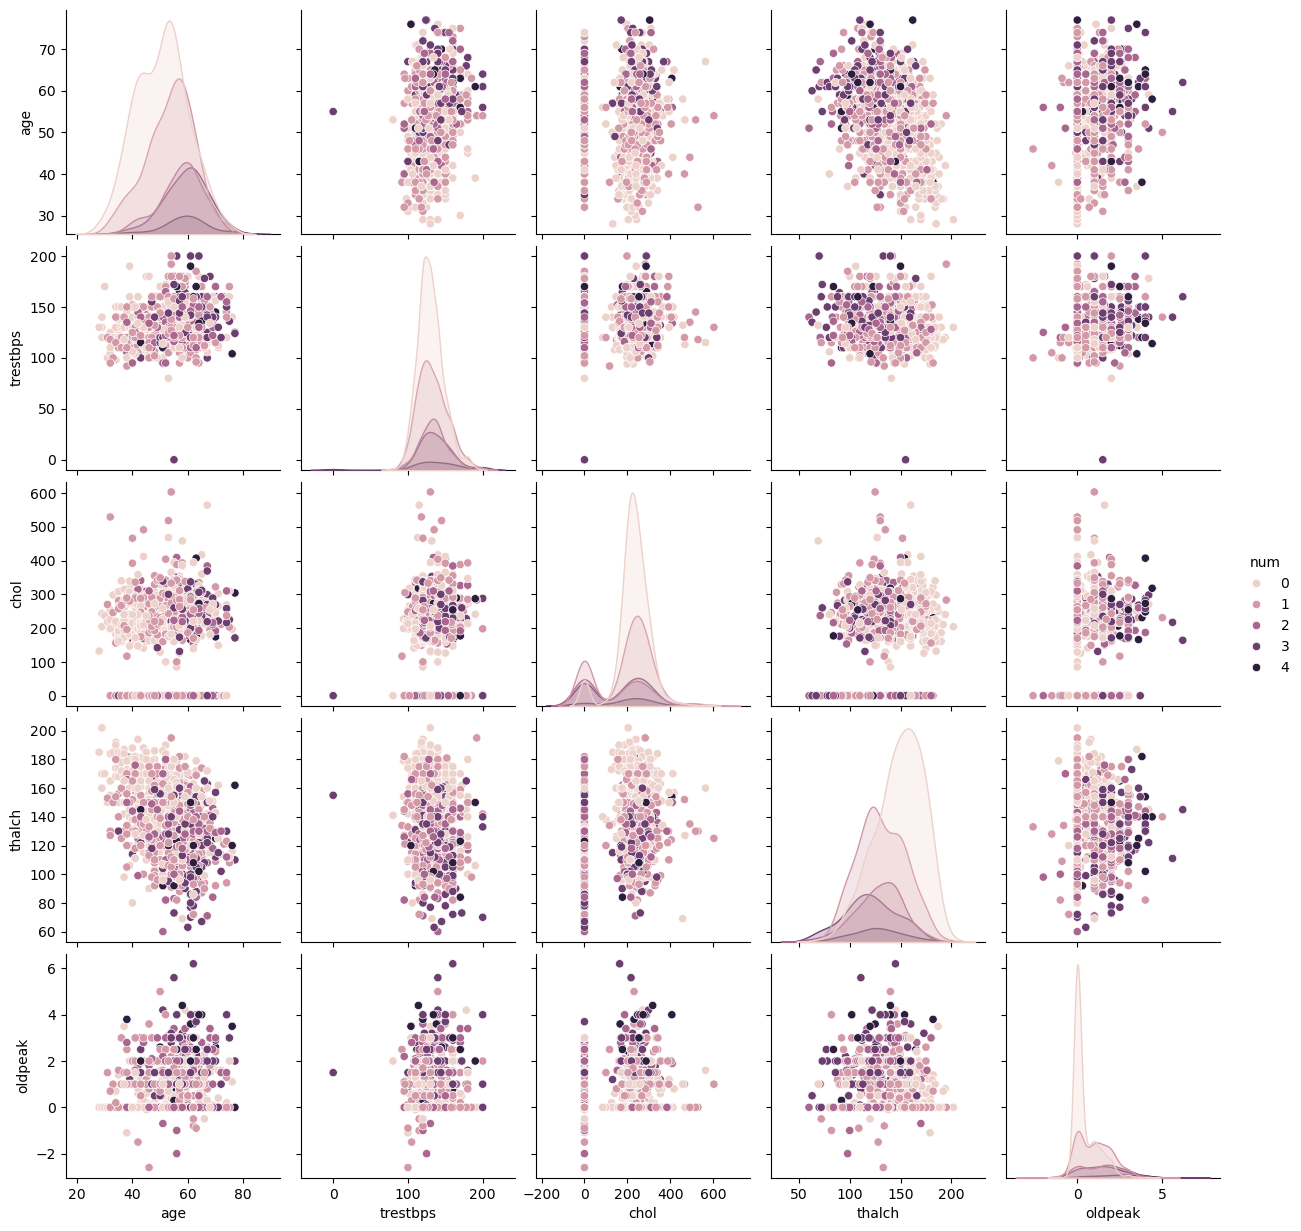

In [6]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(12,10))
corr = df[numeric_cols + ['num']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for important numeric features (use 'num' as target)
sns.pairplot(df[['age','trestbps','chol','thalch','oldpeak','num']], hue='num')
plt.show()


6️⃣ Outlier handling (IQR capping)

In [7]:
for col in ['chol','trestbps','thalch','oldpeak']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)


7️⃣ Missing value handling

In [8]:
df.isnull().sum()
# If null exists
# df[col].fillna(df[col].median(), inplace=True) # numeric
# df[col].fillna(df[col].mode()[0], inplace=True) # categorical


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9896\1232698753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9896\1232698753.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [10]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

8️⃣ Encoding categorical features

In [11]:
# Label encoding for binary
df['sex'] = df['sex'].map({'Male':1,'Female':0})
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# One-hot encoding for nominal categories
df = pd.get_dummies(df, columns=['cp','thal','slope'], drop_first=True)


9️⃣ Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age','trestbps','chol','thalch','oldpeak']  # correct column name 'thalch'
df[num_cols] = scaler.fit_transform(df[num_cols])


🔟 Feature selection (optional)

In [13]:
# from sklearn.feature_selection import SelectKBest, f_classif

# X = df.drop('num', axis=1)
# y = df['num']

# selector = SelectKBest(score_func=f_classif, k=12)
# X_selected = selector.fit_transform(X, y)
# selected_cols = X.columns[selector.get_support()]
# print("Selected features:", selected_cols.tolist())


Train/Test split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, test_size=0.2, stratify=y, random_state=42)


NameError: name 'X' is not defined

Baseline model — Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]


Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC={roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()


Stronger models: RandomForest & XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
y_prob_xgb = xgb_clf.predict_proba(X_test)[:,1]


Cross-validation: Stratified k-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X[selected_cols], y, cv=skf, scoring='roc_auc')
print("RandomForest Stratified CV ROC-AUC:", scores.mean())


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators':[100,200,300], 'max_depth':[3,5,7,10], 'min_samples_split':[2,5,10]}
rsearch = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=skf, scoring='roc_auc', n_jobs=-1, random_state=42)
rsearch.fit(X_train, y_train)
best_rf = rsearch.best_estimator_
print("Best params:", rsearch.best_params_)


Save model

In [ ]:
import joblib
joblib.dump(best_rf, 'best_rf_model.pkl')
# Later load: model = joblib.load('best_rf_model.pkl')


✅ এভাবে তুমি পাইপলাইন ছাড়া step-by-step Heart Disease classification project করতে পারবে।

Matplotlib/Seaborn দিয়ে বুঝবে numeric/categorical distribution, outliers, correlations

Feature engineering (encoding, scaling, selection)

Baseline + strong models

Evaluation metrics, ROC-AUC, confusion matrix

Cross-validation, hyperparameter tuning

Model save